# Planet: Understanding the Amazon deforestation from Space challenge

Add the files to the python path according to the project structure

In [1]:
import sys

sys.path.append('../src')
sys.path.append('../tests')

## Import required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Inspect image labels
Each image can be tagged with multiple tags, lets see all uniques tags

In [3]:
train_jpeg_dir, test_jpeg_dir, train_csv_file = helper.get_jpeg_data_files_paths()
labels_df = pd.read_csv(train_csv_file)
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [12]:
# Print all unique tags
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in labels_df['tags'].values]))
print(set(labels_list))

{'habitation', 'cloudy', 'selective_logging', 'partly_cloudy', 'bare_ground', 'primary', 'agriculture', 'haze', 'cultivation', 'artisinal_mine', 'blooming', 'road', 'clear', 'blow_down', 'water', 'conventional_mine', 'slash_burn'}


### Repartition of each labels

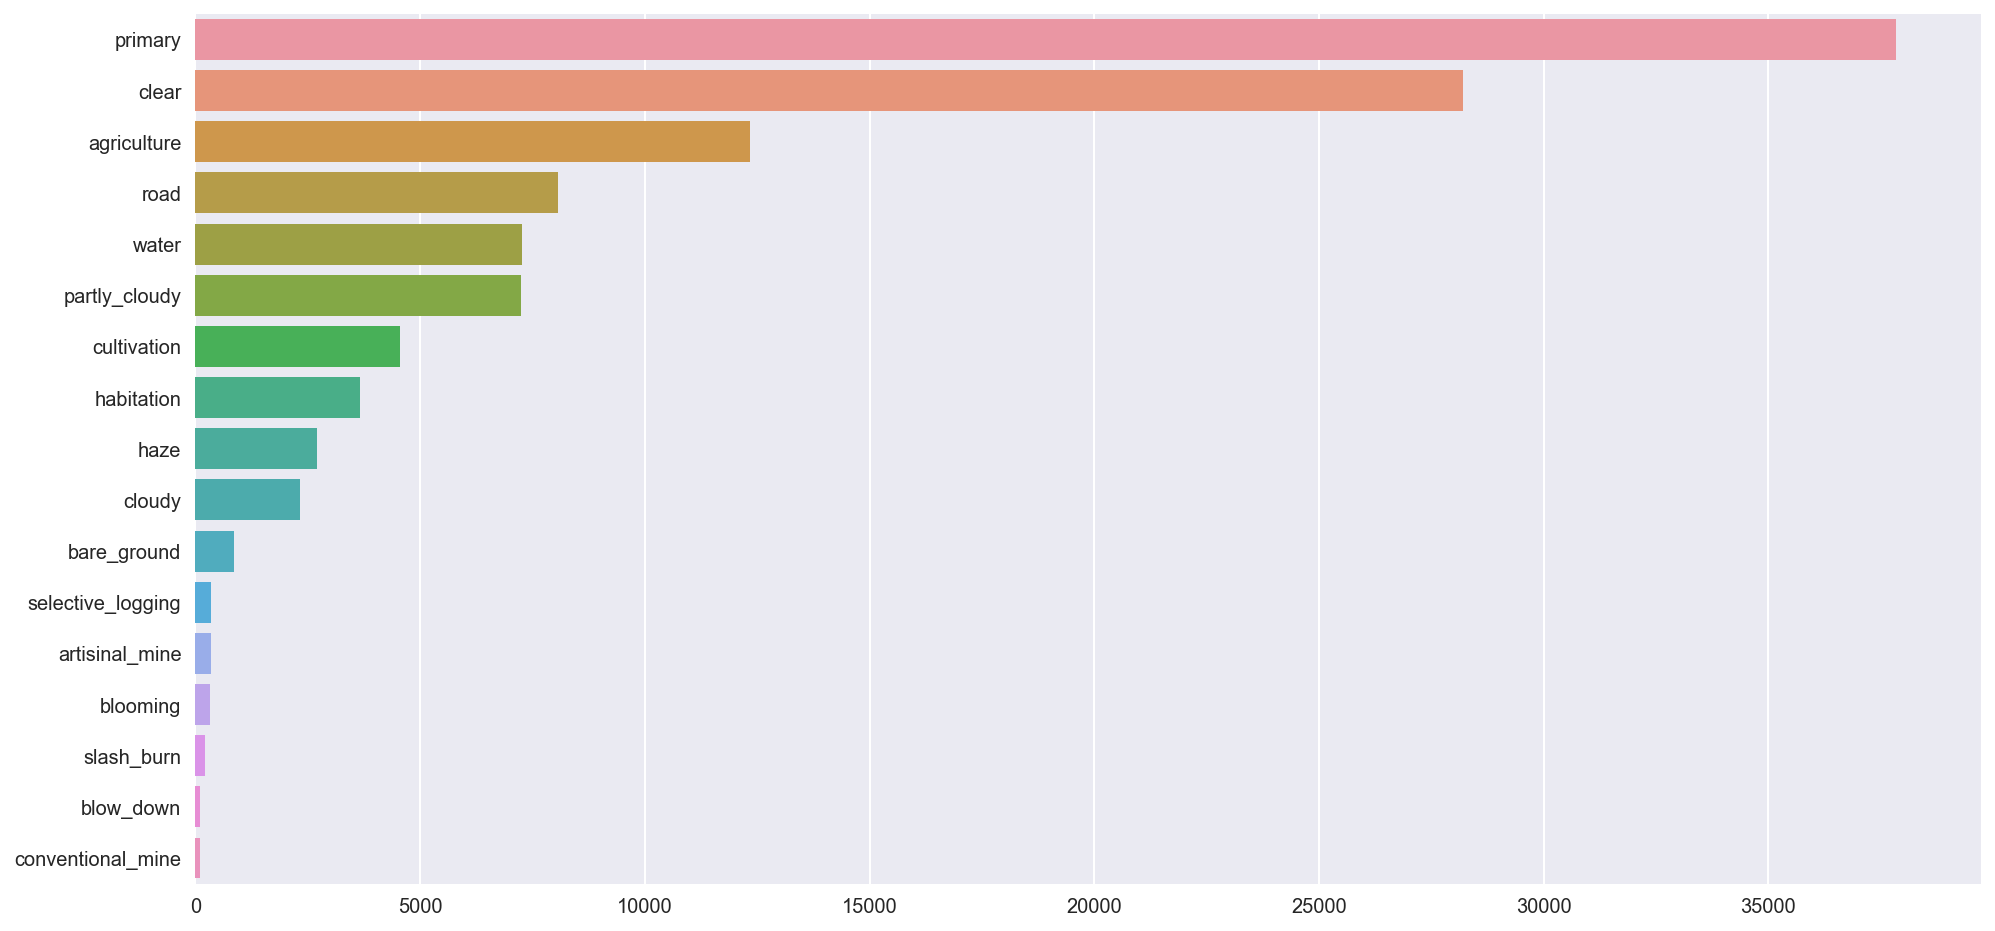

In [36]:
# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')